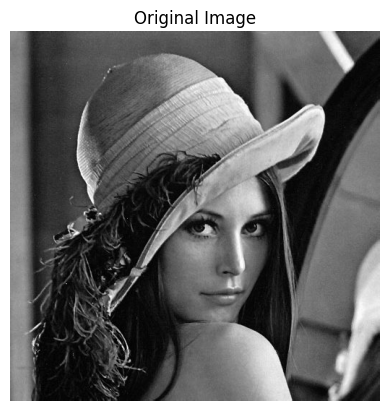

Image Size: 512x512, Channels: 3
Total Pixels: 262144
Black Pixel Count: 199351


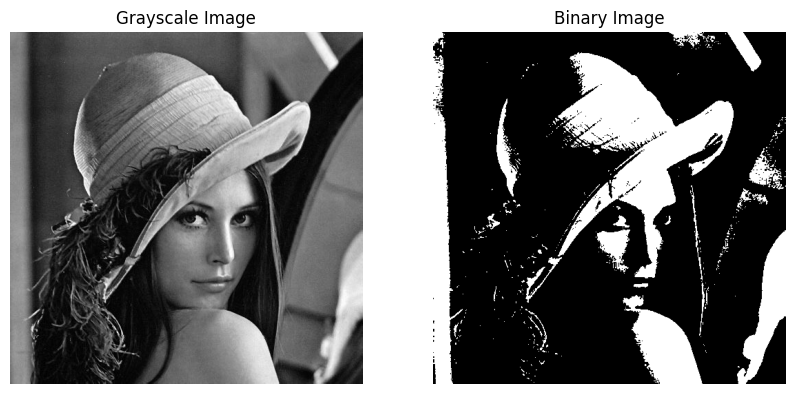

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def task1(image_path):
    # Read the image
    image = cv2.imread('/content/girl.jpg')
    if image is None:
        print("Error: Image not found or unable to load.")
        return

    # Convert BGR to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the image
    plt.imshow(image_rgb)
    plt.title("Original Image")
    plt.axis("off")
    plt.show()

    # Extract image size
    height, width, channels = image.shape
    print(f"Image Size: {width}x{height}, Channels: {channels}")

    # Calculate number of pixels
    total_pixels = height * width
    print(f"Total Pixels: {total_pixels}")

    # Convert to Grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    cv2.imwrite("grayscale.jpg", gray_image)

    # Convert to Binary (Thresholding)
    _, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
    cv2.imwrite("binary.jpg", binary_image)

    # Count black pixels
    black_pixel_count = np.sum(binary_image == 0)
    print(f"Black Pixel Count: {black_pixel_count}")

    # Show grayscale and binary images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(gray_image, cmap='gray')
    plt.title("Grayscale Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(binary_image, cmap='gray')
    plt.title("Binary Image")
    plt.axis("off")

    plt.show()

# Run task
task1('image.jpg')


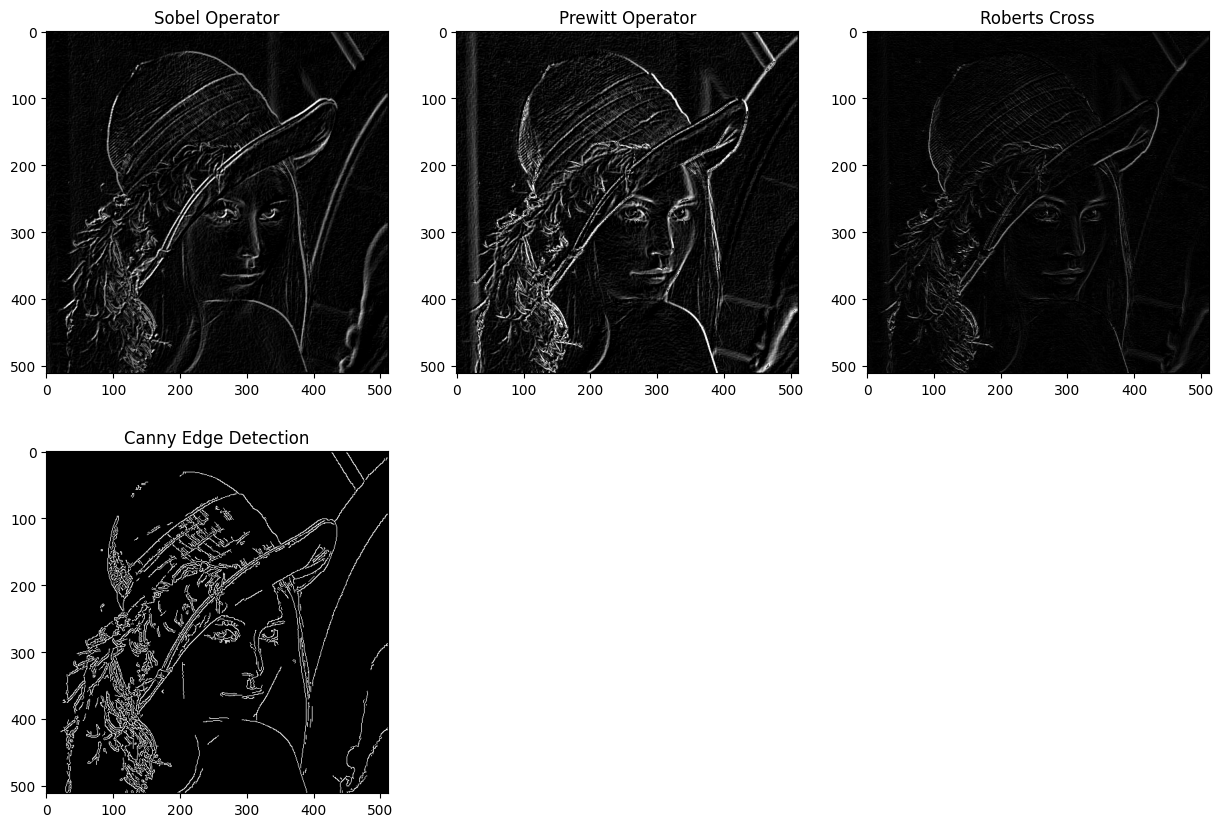

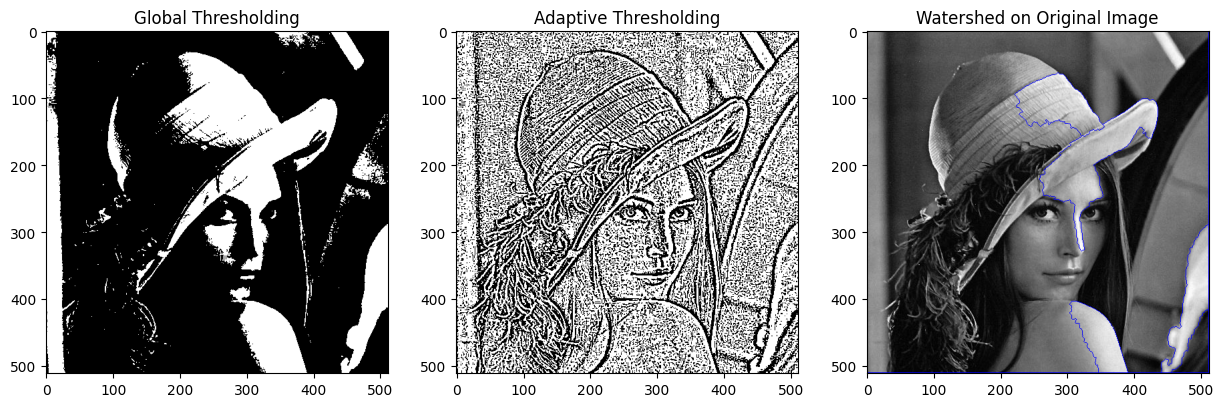

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def task2(image_path):
    image = cv2.imread('/content/girl.jpg')
    if image is None:
        print("Error: Image not found or unable to load.")
        return

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Edge Detection using different operators
    gradients_sobelx = cv2.Sobel(image,-1, 1, 0)
    gradients_sobely = cv2.Sobel(image,-1, 0, 1)
    gradients_sobelxy = cv2.addWeighted(gradients_sobelx,0.5,gradients_sobely,0.5,0)
    prewitt_x = cv2.filter2D(gray, -1, np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]]))
    prewitt_y = cv2.filter2D(gray, -1, np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]]))
    roberts_x = cv2.filter2D(gray, -1, np.array([[1, 0], [0, -1]]))
    roberts_y = cv2.filter2D(gray, -1, np.array([[0, 1], [-1, 0]]))
    canny = cv2.Canny(gray, 100, 200)

    # Display edge detection results
    plt.figure(figsize=(15, 10))
    plt.subplot(2, 3, 1), plt.imshow(gradients_sobelxy, cmap='gray'), plt.title("Sobel Operator")
    plt.subplot(2, 3, 2), plt.imshow(prewitt_x + prewitt_y, cmap='gray'), plt.title("Prewitt Operator")
    plt.subplot(2, 3, 3), plt.imshow(roberts_x + roberts_y, cmap='gray'), plt.title("Roberts Cross")
    plt.subplot(2, 3, 4), plt.imshow(canny, cmap='gray'), plt.title("Canny Edge Detection")
    plt.show()

    # Image Segmentation
    _, global_thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    adaptive_thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

    # Watershed Segmentation on Original Image
    kernel = np.ones((3,3), np.uint8)
    opening = cv2.morphologyEx(global_thresh, cv2.MORPH_OPEN, kernel, iterations=2)
    sure_bg = cv2.dilate(opening, kernel, iterations=3)
    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
    _, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg, sure_fg)

    # Corrected markers assignment
    _, markers = cv2.connectedComponents(sure_fg)  # Corrected line
    markers = markers + 1
    markers[unknown == 255] = 0  # Now this line works correctly

    image_watershed = image.copy()
    markers = cv2.watershed(image_watershed, markers)
    image_watershed[markers == -1] = [255, 0, 0]  # Mark boundaries in red

    # Display segmentation results
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1), plt.imshow(global_thresh, cmap='gray'), plt.title("Global Thresholding")
    plt.subplot(1, 3, 2), plt.imshow(adaptive_thresh, cmap='gray'), plt.title("Adaptive Thresholding")
    plt.subplot(1, 3, 3), plt.imshow(cv2.cvtColor(image_watershed, cv2.COLOR_BGR2RGB)), plt.title("Watershed on Original Image")
    plt.show()

# Run task 2
task2('image.jpg')

